<a href="https://colab.research.google.com/github/GuanRuLai/Deep-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

##Import dataset

In [ ]:
import os
if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

import pandas as pd
df = pd.read_csv("ToyotaUsedCars.csv")

# check the columns of the data
print(df.keys())

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'price'],
      dtype='object')


##Split independent variables and dependent variable

In [ ]:
import HappyML.preprocessor as pp

X, Y = pp.decomposition(dataset=df, x_columns=[i for i in range(8)], y_columns=[8])
print(X)
print(Y)

               model  year transmission  mileage fuelType  tax   mpg  \
0               GT86  2016       Manual    24089   Petrol  265  36.2   
1               GT86  2017       Manual    18615   Petrol  145  36.2   
2               GT86  2015       Manual    27469   Petrol  265  36.2   
3               GT86  2017       Manual    14736   Petrol  150  36.2   
4               GT86  2017       Manual    36284   Petrol  145  36.2   
...              ...   ...          ...      ...      ...  ...   ...   
6733              IQ  2011    Automatic    30000   Petrol   20  58.9   
6734   Urban Cruiser  2011       Manual    36154   Petrol  125  50.4   
6735   Urban Cruiser  2012       Manual    46000   Diesel  125  57.6   
6736   Urban Cruiser  2011       Manual    60700   Petrol  125  50.4   
6737   Urban Cruiser  2011       Manual    45128   Petrol  125  50.4   

      engineSize  
0            2.0  
1            2.0  
2            2.0  
3            2.0  
4            2.0  
...          ...  
67

##Handle missing data

In [ ]:
print(df.isnull().sum())

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64


##Digitalize categorical data

In [ ]:
X = pp.onehot_encoder(X, columns = [0, 2, 4], remove_trap=True)
print(X)

      model_ Avensis_1  model_ Aygo  model_ C-HR_1  model_ Camry  \
0                    0            0              0             0   
1                    0            0              0             0   
2                    0            0              0             0   
3                    0            0              0             0   
4                    0            0              0             0   
...                ...          ...            ...           ...   
6733                 0            0              0             0   
6734                 0            0              0             0   
6735                 0            0              0             0   
6736                 0            0              0             0   
6737                 0            0              0             0   

      model_ Corolla_1  model_ GT86  model_ Hilux  model_ IQ  \
0                    0            1             0          0   
1                    0            1             0      

##Split training set and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

      model_ Avensis  model_ Aygo  model_ C-HR  model_ Camry  model_ Corolla  \
3943               0            1            0             0               0   
2632               0            0            0             0               0   
828                0            0            0             0               0   
1371               0            0            0             0               0   
3051               0            0            0             0               0   
...              ...          ...          ...           ...             ...   
4931               0            1            0             0               0   
3264               0            0            0             0               0   
1653               0            0            0             0               0   
2607               0            0            0             0               0   
2732               0            0            0             0               0   

      model_ GT86  model_ Hilux  model_

##Feature scaling

In [ ]:
print(X.describe(include = "all"))

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train)
print(X_test)

       model_ Avensis  model_ Aygo  model_ C-HR  model_ Camry  model_ Corolla  \
count     6738.000000  6738.000000  6738.000000   6738.000000     6738.000000   
mean         0.017067     0.291036     0.071089      0.001633        0.039626   
std          0.129532     0.454274     0.256993      0.040375        0.195093   
min          0.000000     0.000000     0.000000      0.000000        0.000000   
25%          0.000000     0.000000     0.000000      0.000000        0.000000   
50%          0.000000     0.000000     0.000000      0.000000        0.000000   
75%          0.000000     1.000000     0.000000      0.000000        0.000000   
max          1.000000     1.000000     1.000000      1.000000        1.000000   

       model_ GT86  model_ Hilux    model_ IQ  model_ Land Cruiser  \
count  6738.000000   6738.000000  6738.000000          6738.000000   
mean      0.010834      0.012763     0.001187             0.007569   
std       0.103529      0.112260     0.034439             0.

# Neural network processing

##Build levels of neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 6738 / 5(8 + 1) = 149.7
model.add(Dense(input_dim=X_train.shape[1], units=150, kernel_initializer="glorot_normal", activation="relu"))
# 6738 / 5(150 + 1) = 8.9
model.add(Dense(units=9, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="linear"))

print(model.summary()) # 了解神經網路各層級架構
print(model.inputs) # 了解「輸入層」架構
print(model.outputs) # 了解「輸出層」架構

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 150)               4350      
                                                                 
 dense_10 (Dense)            (None, 9)                 1359      
                                                                 
 dense_11 (Dense)            (None, 1)                 10        
                                                                 
Total params: 5719 (22.34 KB)
Trainable params: 5719 (22.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
[<KerasTensor: shape=(None, 28) dtype=float32 (created by layer 'dense_9_input')>]
[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_11')>]


##Model compiling

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

##Model training

In [ ]:
epochs_metrics = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=5, epochs=50)

Epoch 1/50
863/863 [==============================] - 5s 4ms/step - loss: 151665632.0000 - mse: 151665632.0000 - val_loss: 58905220.0000 - val_mse: 58905220.0000
Epoch 2/50
863/863 [==============================] - 4s 4ms/step - loss: 16624515.0000 - mse: 16624515.0000 - val_loss: 9825263.0000 - val_mse: 9825263.0000
Epoch 3/50
863/863 [==============================] - 3s 4ms/step - loss: 5845760.5000 - mse: 5845760.5000 - val_loss: 6795745.5000 - val_mse: 6795745.5000
Epoch 4/50
863/863 [==============================] - 3s 4ms/step - loss: 4284179.5000 - mse: 4284179.5000 - val_loss: 5201794.0000 - val_mse: 5201794.0000
Epoch 5/50
863/863 [==============================] - 4s 4ms/step - loss: 3532718.5000 - mse: 3532718.5000 - val_loss: 4276740.5000 - val_mse: 4276740.5000
Epoch 6/50
863/863 [==============================] - 3s 4ms/step - loss: 3063144.0000 - mse: 3063144.0000 - val_loss: 3629872.5000 - val_mse: 3629872.5000
Epoch 7/50
863/863 [==============================] - 3s

##Model adjustment

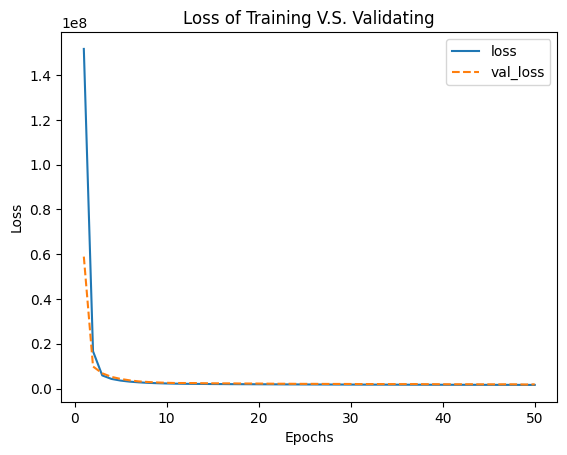

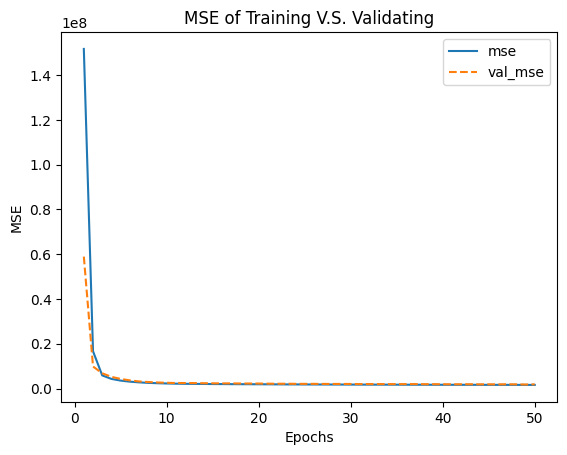

In [ ]:
import HappyML.model_drawer as md
md.epochs_metrics_plot(epochs_metrics.history, keys = ("loss", "val_loss"),
     title = "Loss of Training V.S. Validating", xyLabel = ("Epochs", "Loss"))
md.epochs_metrics_plot(epochs_metrics.history, keys = ("mse", "val_mse"),
     title = "MSE of Training V.S. Validating", xyLabel = ("Epochs", "MSE"))

##Answer prediction


In [ ]:
Y_pred = pd.DataFrame(model.predict(x=X_test), index=Y_test.index, columns=Y_test.columns)
df_predict = pd.concat([Y_test, Y_pred], axis=1)
print(df_predict)

43/43 [==============================] - 0s 2ms/step
      price         price
2527  11295  11444.078125
134   18995  18448.933594
4844   8950   9838.582031
3638   9995  10104.289062
98    15990  18255.511719
...     ...           ...
3214  13998  15044.382812
1042  10495  10283.922852
1116   9233   9560.322266
5723  22498  24092.113281
1362  12295  12099.458008

[1348 rows x 2 columns]


##Model evaluation

In [ ]:
test_loss, test_mse = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set:", test_mse)

43/43 [==============================] - 0s 4ms/step - loss: 1601035.6250 - mse: 1601035.6250
Loss of Testing Set: 1601035.625
MSE of Testing Set: 1601035.625
